# **Step 1: Install Required Libraries**
Since you mentioned that you don't have any libraries installed, you'll need to install pandas, matplotlib, and seaborn. Open your terminal or command prompt and run the following commands:

In [23]:
pip install pandas matplotlib seaborn

# **Step 2: Import Required Libraries**
After installing the libraries, you can import them in your Python script or Jupyter notebook:

In [22]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 3: Load the Dataset**
Assuming you have your CSV file ready, use the following code to load it into a pandas DataFrame. Replace 'your_file.csv' with the actual path to your CSV file.

In [24]:
# Load the dataset
file_path = '/content/Cyclistic Case Study.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)
print(df.head())

            ride_id rideable_type           started_at             ended_at  \
0  EACB19130B0CDA4A   docked_bike  2020-01-21 20:06:59  2020-01-21 20:14:30   
1  8FED874C809DC021   docked_bike  2020-01-30 14:22:39  2020-01-30 14:26:22   
2  789F3C21E472CA96   docked_bike  2020-01-09 19:29:26  2020-01-09 19:32:17   
3  C9A388DAC6ABF313   docked_bike  2020-01-06 16:17:07  2020-01-06 16:25:56   
4  943BC3CBECCFD662   docked_bike  2020-01-30 08:37:16  2020-01-30 08:42:48   

         start_station_name  start_station_id                end_station_name  \
0  Western Ave & Leland Ave               239           Clark St & Leland Ave   
1   Clark St & Montrose Ave               234  Southport Ave & Irving Park Rd   
2    Broadway & Belmont Ave               296        Wilton Ave & Belmont Ave   
3    Clark St & Randolph St                51        Fairbanks Ct & Grand Ave   
4      Clinton St & Lake St                66           Wells St & Hubbard St   

   end_station_id  start_lat  start_ln

# **Step 4: Convert Date Columns to Datetime:**
The started_at and ended_at columns are converted from string format to datetime format using pd.to_datetime(). This allows us to perform time-based calculations.

In [25]:
# Convert the 'started_at' and 'ended_at' columns to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# **Step 5: Create New Columns for Analysis:**
We create new columns:
ride_duration: Calculates the duration of each ride in minutes by subtracting started_at from ended_at and converting the result from seconds to minutes.
ride_month: Extracts the month name from the started_at date.
ride_weekday: Extracts the weekday name from the started_at date.

In [26]:
# Create new columns for analysis
df['ride_duration'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60  # Ride duration in minutes
df['ride_month'] = df['started_at'].dt.month_name()  # Extract month name
df['ride_weekday'] = df['started_at'].dt.day_name()  # Extract weekday name

# **Step 6: Calculate Monthly Average Duration**
Calculate Average Monthly Duration:

We group the DataFrame by the ride_month column and calculate the mean of ride_duration using df.groupby('ride_month')['ride_duration'].mean().
The reset_index() method is called to convert the grouped data back into a DataFrame.
We rename the columns to ride_month and average_duration for clarity.
The month names are categorized and ordered to ensure that they appear in the correct chronological order in the final plot.

In [27]:
# Calculate average monthly duration
average_monthly_duration = df.groupby('ride_month')['ride_duration'].mean().reset_index()
average_monthly_duration.columns = ['ride_month', 'average_duration']
average_monthly_duration['ride_month'] = pd.Categorical(average_monthly_duration['ride_month'],
                                                         categories=["January", "February", "March", "April",
                                                                     "May", "June", "July", "August", "September",
                                                                     "October", "November", "December"],
                                                         ordered=True)
average_monthly_duration = average_monthly_duration.sort_values('ride_month')

# **Step 7: Plotting Average Monthly Duration:**
We create a bar plot using sns.barplot() to visualize the average ride duration for each month, providing insights into how ride durations vary across different months.

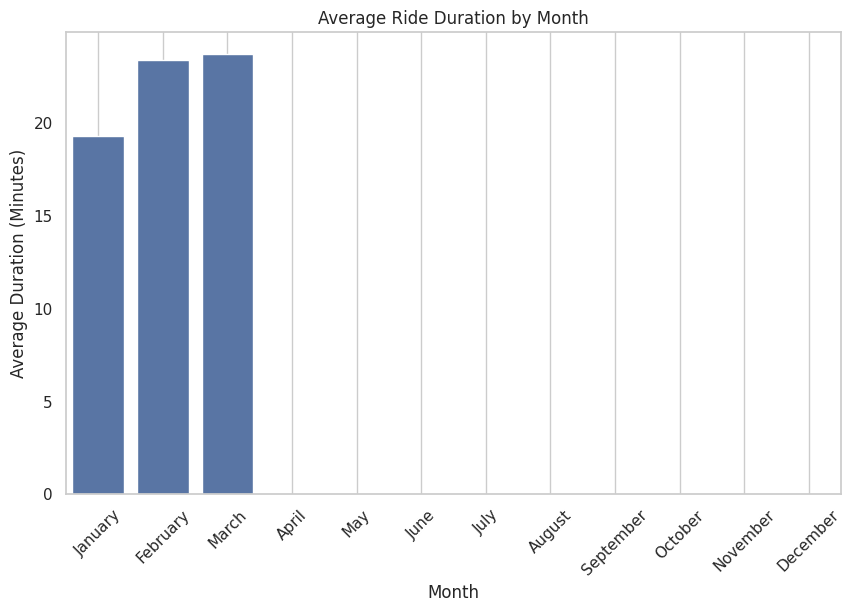

In [28]:
# Plotting average monthly duration
plt.figure(figsize=(10, 6))
sns.barplot(data=average_monthly_duration, x='ride_month', y='average_duration')
plt.title('Average Ride Duration by Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# **Step 8: Plotting Ride Duration Distribution:**

We create a histogram to visualize the distribution of ride durations using sns.histplot(), with a kernel density estimate (KDE) to show the density of ride durations.

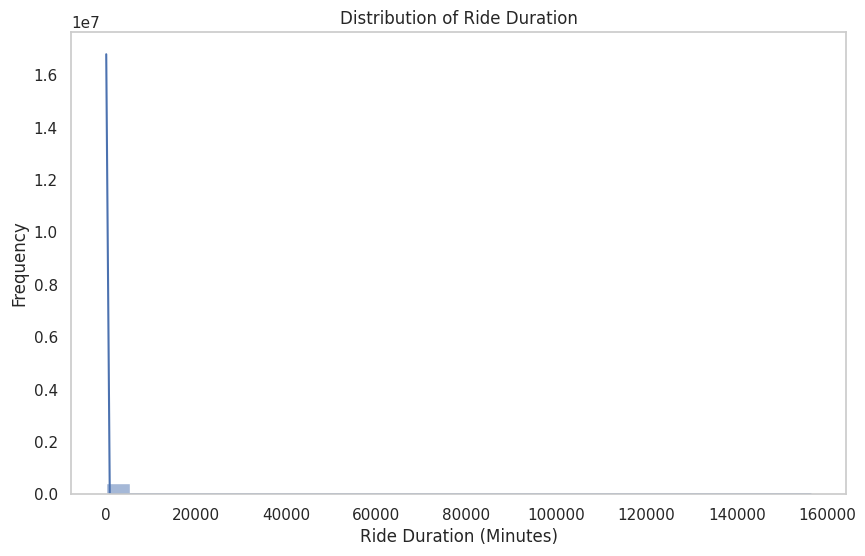

In [29]:
# Plotting ride duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['ride_duration'], bins=30, kde=True)
plt.title('Distribution of Ride Duration')
plt.xlabel('Ride Duration (Minutes)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# **Step 9: Plotting Ride Counts by Month:**

A count plot is created to display the number of rides per month using sns.countplot(). The months are ordered based on their counts for clarity.

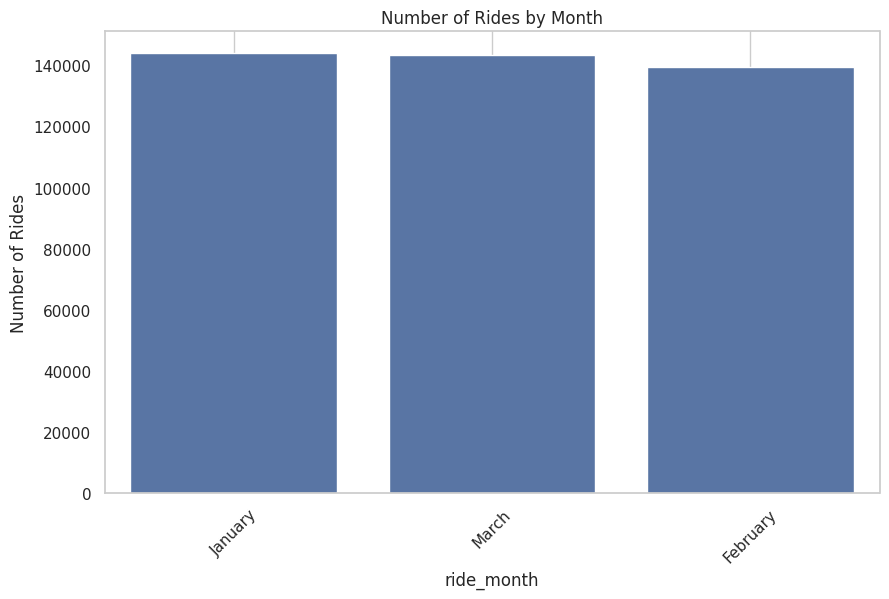

In [30]:
# Plotting ride counts by month
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ride_month', order=df['ride_month'].value_counts().index)
plt.title('Number of Rides by Month')
plt.xticks(rotation=45)
plt.ylabel('Number of Rides')
plt.grid()
plt.show()

# **Step 10: Plotting Ride Counts by Weekday:**

Another count plot shows the number of rides per weekday. This helps analyze how ride counts vary throughout the week.

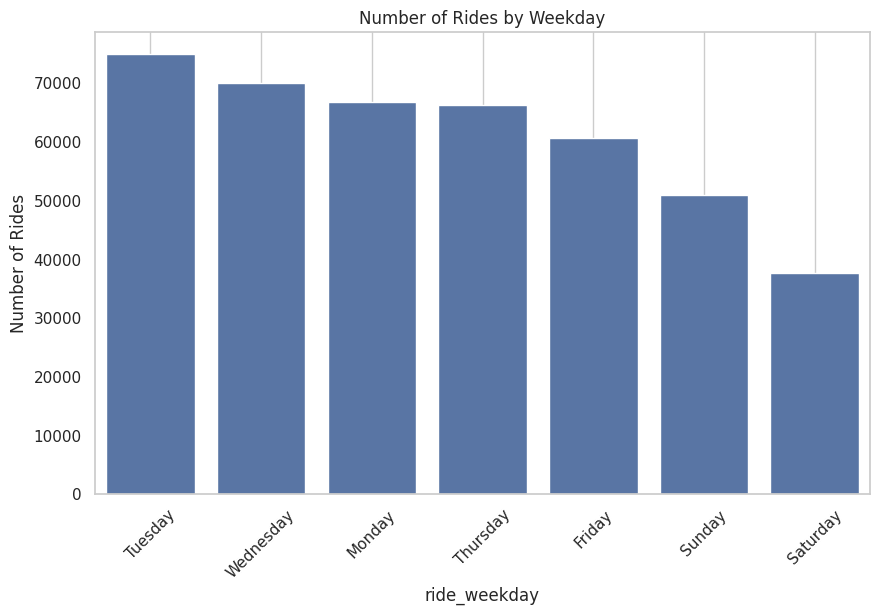

In [31]:
# Plotting ride counts by weekday
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ride_weekday', order=df['ride_weekday'].value_counts().index)
plt.title('Number of Rides by Weekday')
plt.xticks(rotation=45)
plt.ylabel('Number of Rides')
plt.grid()
plt.show()

# **Step 11: Plotting Ride Duration by Rideable Type:**

A box plot is generated to visualize the distribution of ride durations based on the type of bike used (rideable_type). This plot helps identify any outliers and the range of ride durations for each bike type.

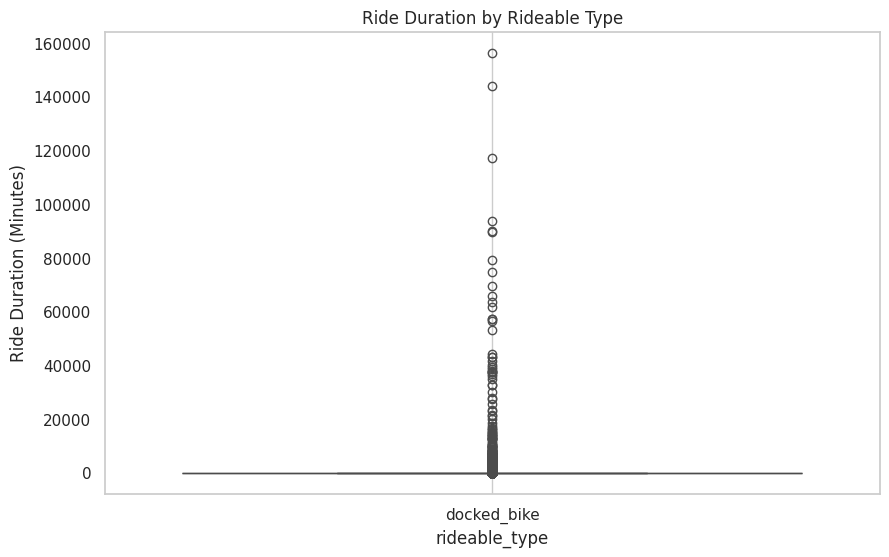

In [32]:
# Plotting ride duration by rideable type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='rideable_type', y='ride_duration')
plt.title('Ride Duration by Rideable Type')
plt.ylabel('Ride Duration (Minutes)')
plt.grid()
plt.show()

# **Step 12: Plotting Ride Counts by Member Type:**

A final count plot shows the number of rides categorized by member type (e.g., members vs. casual users). This analysis helps understand the user demographics for the bike service.

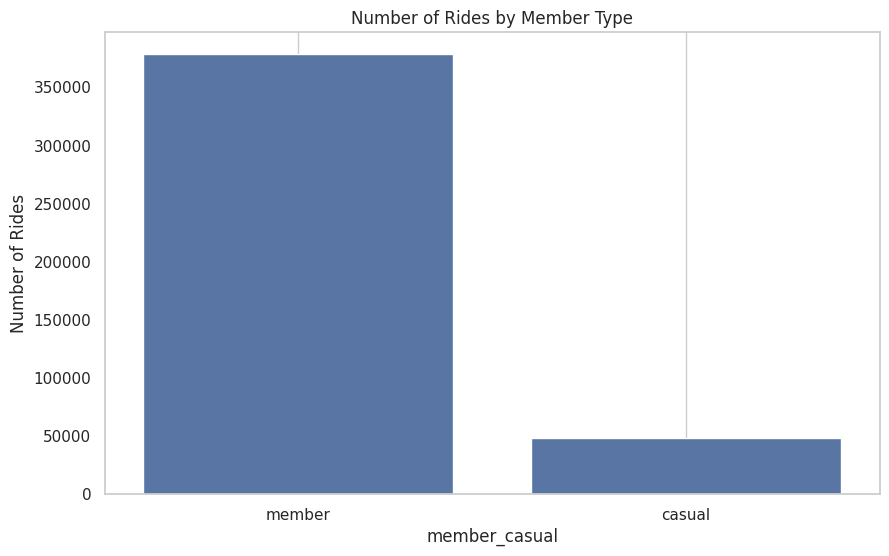

In [33]:
# Plotting ride counts by member type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='member_casual')
plt.title('Number of Rides by Member Type')
plt.ylabel('Number of Rides')
plt.grid()
plt.show()